In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\Aryan Swami\Documents\Jupyter Notebook\california_housing_dataset.csv")

In [ ]:
df.head(6)

In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

# EDA

In [ ]:
sns.jointplot(x="total_bedrooms", y="median_house_value", data=df, alpha=0.4)

In [ ]:
sns.jointplot(x="total_rooms", y="median_house_value", data=df, alpha=0.4)

In [ ]:
sns.pairplot(df, kind = 'scatter', plot_kws={'alpha':0.4})

# Training Model

In [ ]:
from sklearn.model_selection import train_test_split

X= df.drop(['median_house_value'], axis = 1)
y= df['median_house_value']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3)

In [ ]:
train_data = X_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

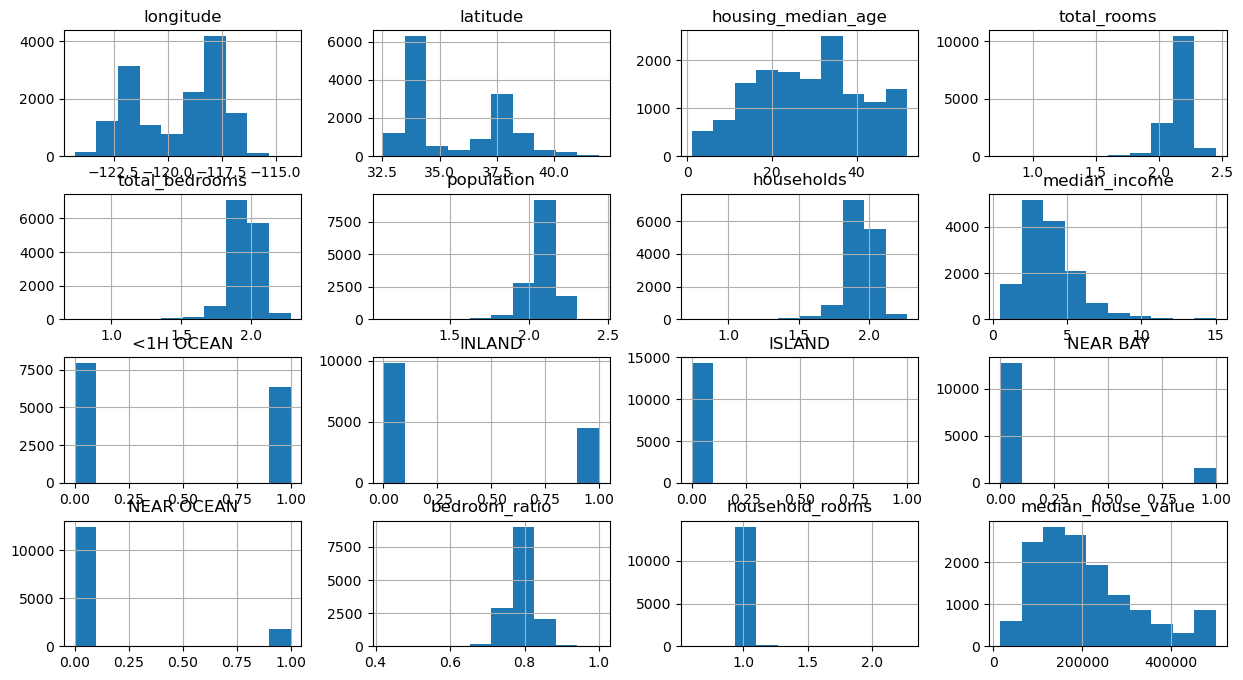

In [36]:
train_data.hist(figsize=(15,8))

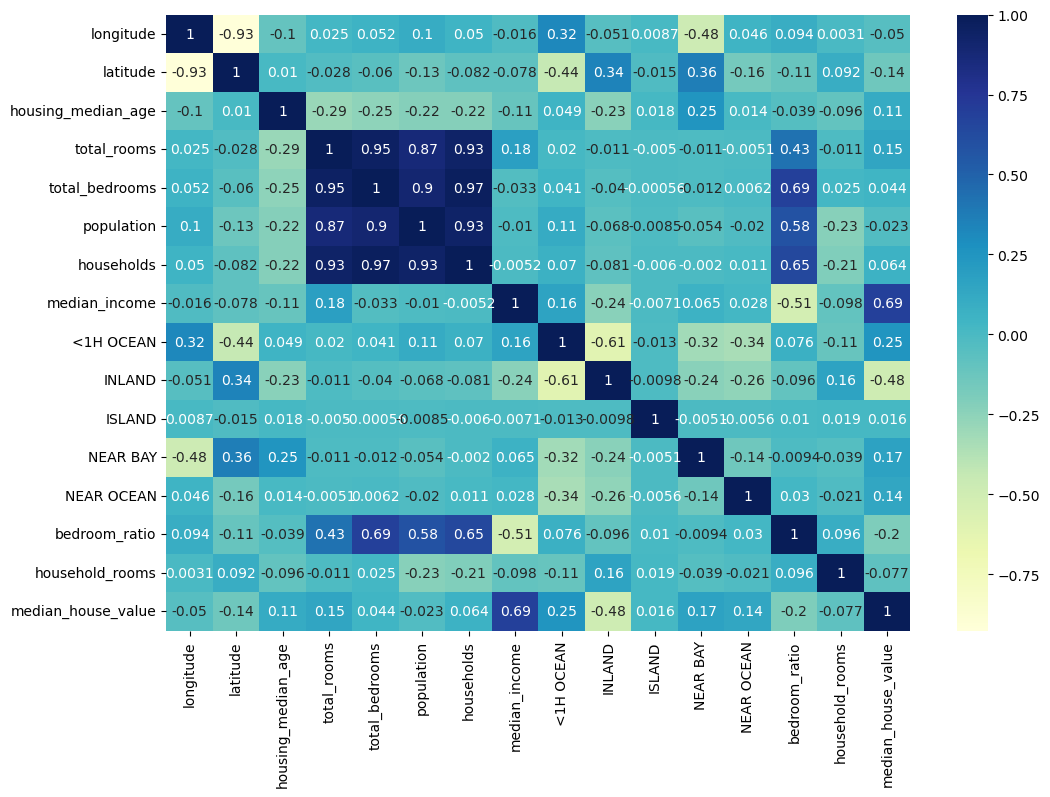

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")
plt.show()

In [38]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

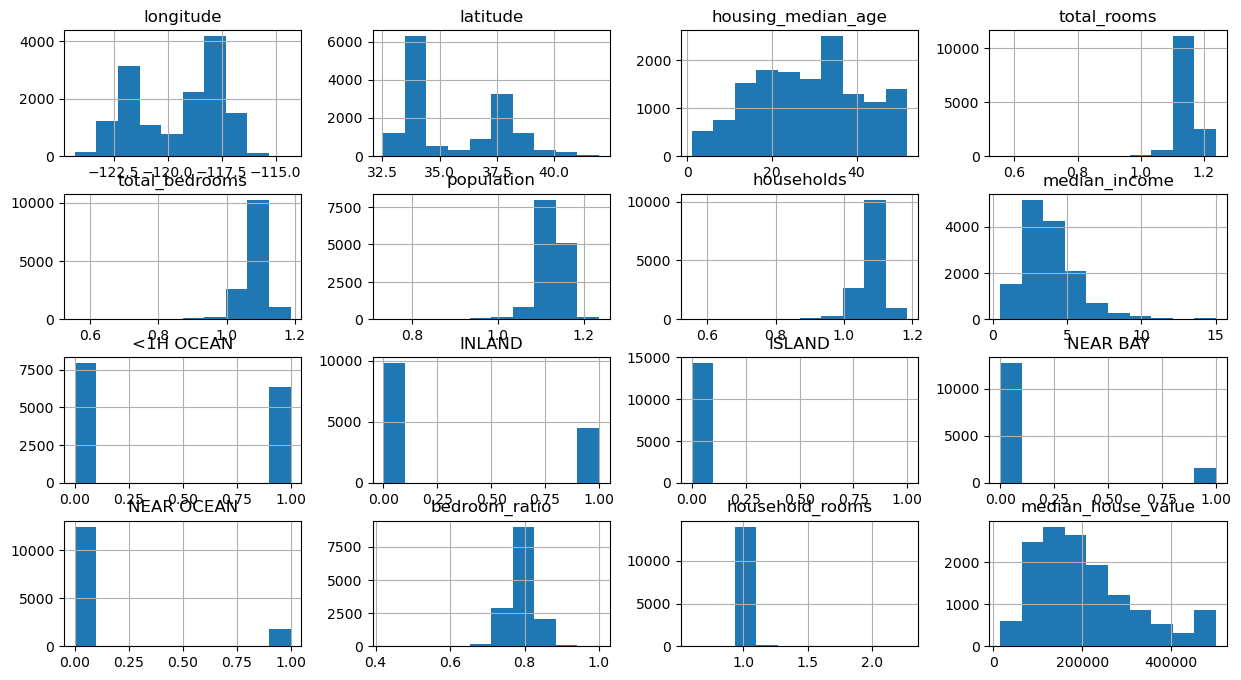

In [39]:
train_data.hist(figsize=(15,8))

In [40]:
train_data.ocean_proximity.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [41]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype= int)).drop(['ocean_proximity'],axis =1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

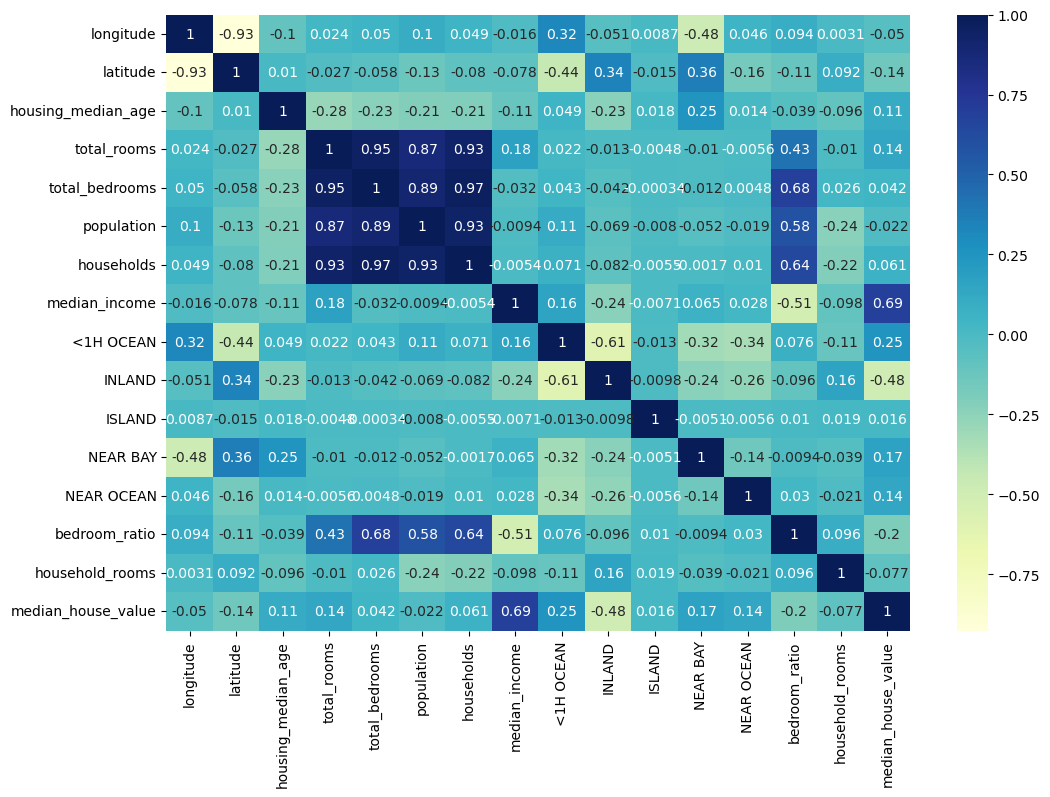

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

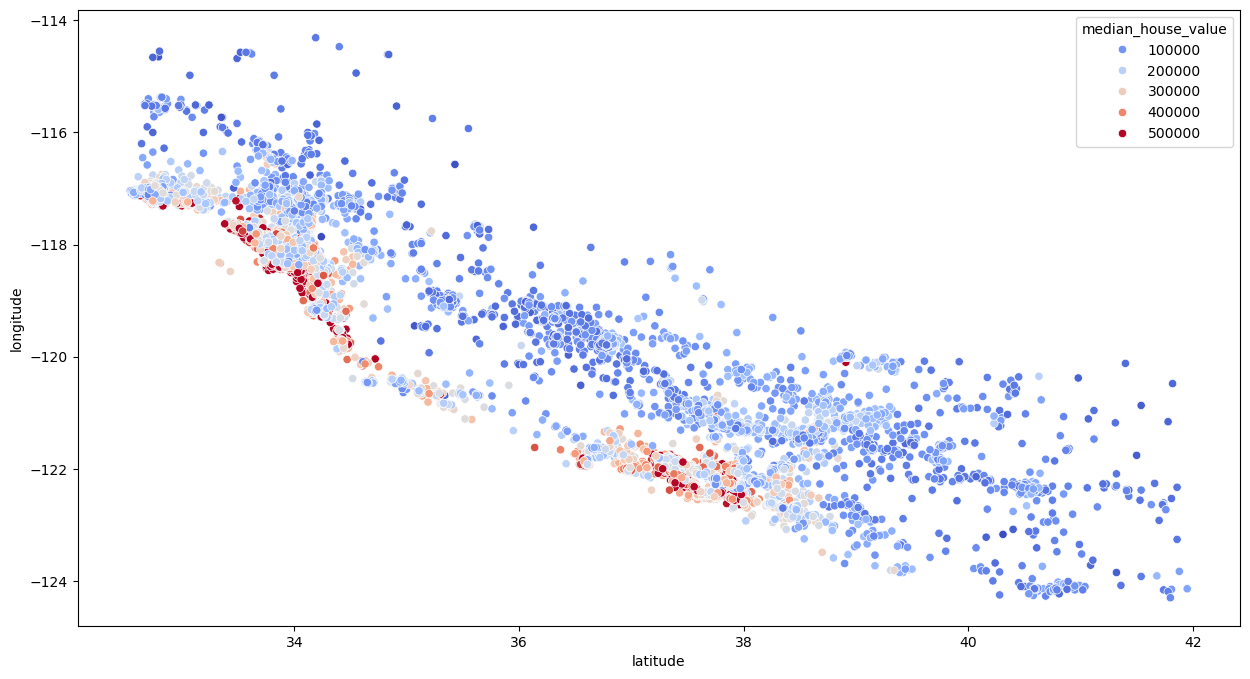

In [43]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y= 'longitude', data = train_data,hue="median_house_value",palette="coolwarm")

# Feature Engineering

In [44]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_bedrooms'] / train_data['households']


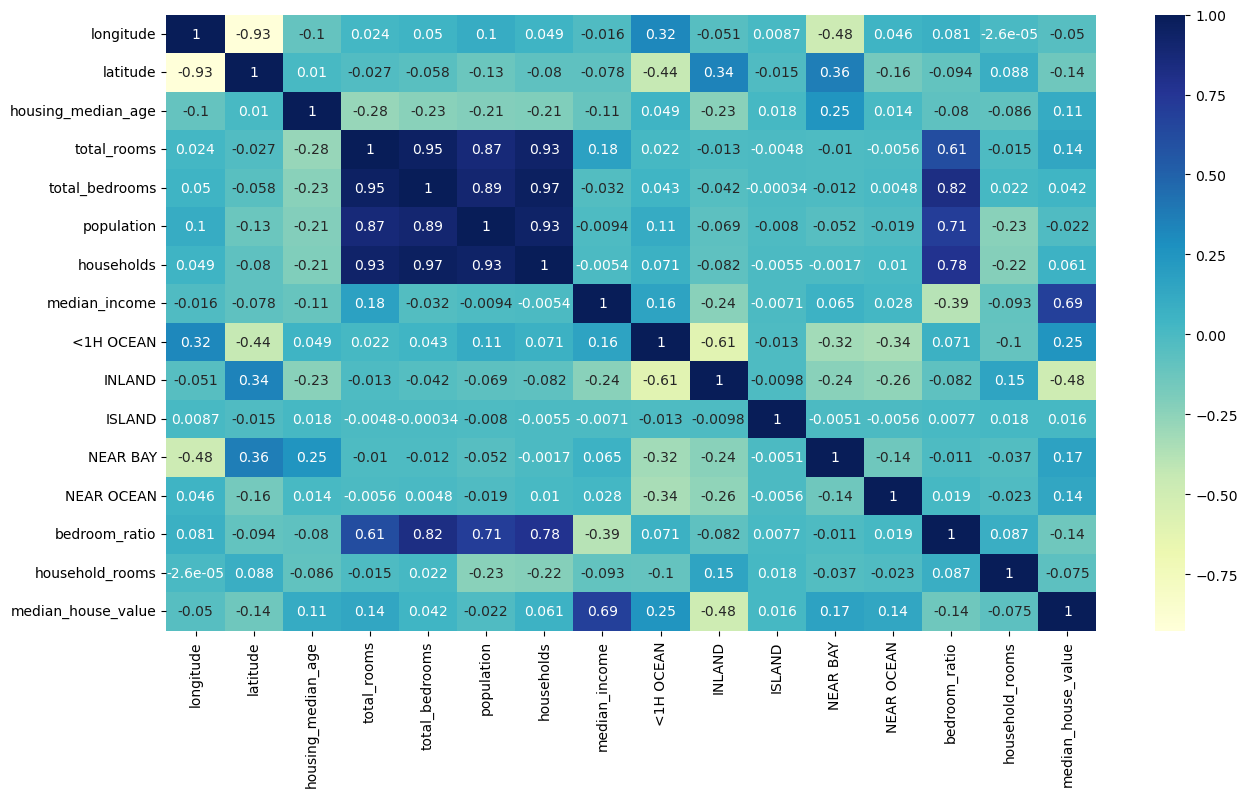

In [45]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")
plt.show()

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X_train, y_train = train_data.drop(['median_house_value'],axis = 1), train_data['median_house_value']



lm.fit(X_train , y_train)

LinearRegression()

In [47]:

test_data = X_test.join(y_test)

# Apply log transformations
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Create dummy variables using bracket notation
if 'ocean_proximity' in test_data.columns:
    ocean_dummies = pd.get_dummies(test_data['ocean_proximity'], dtype=int)
    test_data = pd.concat([test_data, ocean_dummies], axis=1)
    test_data = test_data.drop('ocean_proximity', axis=1)
else:
    print("'ocean_proximity' column not found. Available columns:")
    print(test_data.columns.tolist())

# Create derived features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_bedrooms'] / test_data['households']

'ocean_proximity' column not found. Available columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio', 'household_rooms', 'median_house_value']


In [48]:
X_test, y_test = test_data.drop(['median_house_value'],axis = 1), test_data['median_house_value']


In [49]:
lm.score(X_test,y_test)

0.6675265616106734